In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
num_of_samples = 1000
positive_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_of_samples
)
negative_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_of_samples
)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_of_samples, 1), dtype="float32"),
                     np.ones((num_of_samples, 1), dtype="float32")))

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.8975
Loss at step 1: 0.5469
Loss at step 2: 0.1900
Loss at step 3: 0.1380
Loss at step 4: 0.1232
Loss at step 5: 0.1137
Loss at step 6: 0.1055
Loss at step 7: 0.0981
Loss at step 8: 0.0913
Loss at step 9: 0.0852
Loss at step 10: 0.0797
Loss at step 11: 0.0746
Loss at step 12: 0.0700
Loss at step 13: 0.0658
Loss at step 14: 0.0620
Loss at step 15: 0.0585
Loss at step 16: 0.0554
Loss at step 17: 0.0525
Loss at step 18: 0.0499
Loss at step 19: 0.0475
Loss at step 20: 0.0454
Loss at step 21: 0.0434
Loss at step 22: 0.0416
Loss at step 23: 0.0400
Loss at step 24: 0.0385
Loss at step 25: 0.0372
Loss at step 26: 0.0359
Loss at step 27: 0.0348
Loss at step 28: 0.0338
Loss at step 29: 0.0329
Loss at step 30: 0.0321
Loss at step 31: 0.0313
Loss at step 32: 0.0306
Loss at step 33: 0.0300
Loss at step 34: 0.0294
Loss at step 35: 0.0289
Loss at step 36: 0.0284
Loss at step 37: 0.0280
Loss at step 38: 0.0276
Loss at step 39: 0.0272


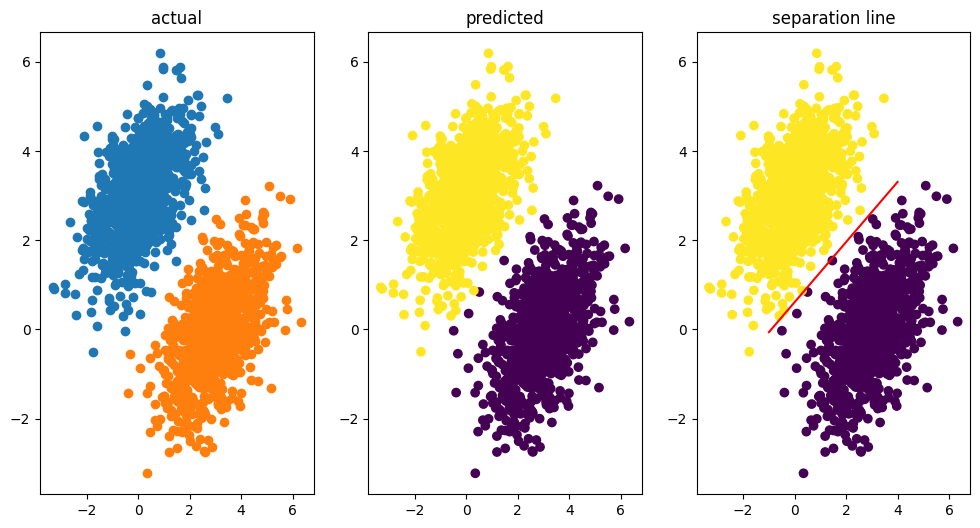

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

predictions = model(inputs)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[1].set_title("predicted")
ax[1].scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
ax[0].set_title("actual")
ax[0].scatter(positive_samples[:,0], positive_samples[:,1])
ax[0].scatter(negative_samples[:,0], negative_samples[:,1])
ax[2].set_title("separation line")
ax[2].plot(x, y, "-r")
ax[2].scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

plt.show()